$(x_1,y_1),(x_2,y_2),...,(x_n,y_n)$
$$\hat y=\hat A+\hat Bx$$
$$y=A+Bx+\epsilon$$
$$S(x)=\sum_{i=0}^{n-1}x_i$$
$$S(y)=\sum_{i=0}^{n-1}y_i$$
$$SS(x)=\sum_{i=0}^{n-1}x_i^2$$
$$SXY(X,Y)=\sum_{i=0}^{n-1}x_iy_i$$
$$\Delta(x)=n\sum_{i=0}^{n-1}x_i^2-\left(\sum_{i=0}^{n-1}x_i\right)^2$$
Punto de corte:
\begin{equation}
A=\frac{SS(X)*S(Y)-S(X)*SXY(X,Y)}{\Delta(X)}
\end{equation}
Pendiente:
\begin{equation}
B=\frac{n*SXY(X,Y)-S(X)*S(Y)}{\Delta(X)}
\end{equation}
Incertidumbre en Y:
\begin{equation}
\sigma_y=\sqrt{\frac{\sum (y_{i}-A-Bx)^2}{n-2}}
\end{equation}
Incertidumbre en A:
\begin{equation}
\Delta A=\sigma_{y}\frac{\sqrt{\sum x_i^2}}{\Delta(X)}
\end{equation}

In [46]:
import linear_fitting as lin
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [49]:
#para guardar figuras con latex
from matplotlib import rc
plt.rc('text', usetex=True)
import seaborn as sns
plt.style.use('seaborn-poster')
sns.set_context("poster")

In [22]:
#data1 corresponde a las mediciones de los ángulos de incidencia
#data2 corresponde a las mediciones de los ángulos de refraccion
data1=pd.read_csv("incident_angle_030347.txt",delimiter="\t",skiprows=1)
data2=pd.read_csv("refraction_trans_ang_030333.txt",delimiter="\t",skiprows=1)

In [18]:
data1

,t,θ
0,0.000000,170.279427
1,0.100100,168.282275
2,0.200200,168.630136
3,0.300300,167.099544
4,0.400400,164.158466
...,...,...
167,16.717745,91.336843
168,16.817856,90.095768
169,16.917967,91.116299
170,17.018067,89.826581


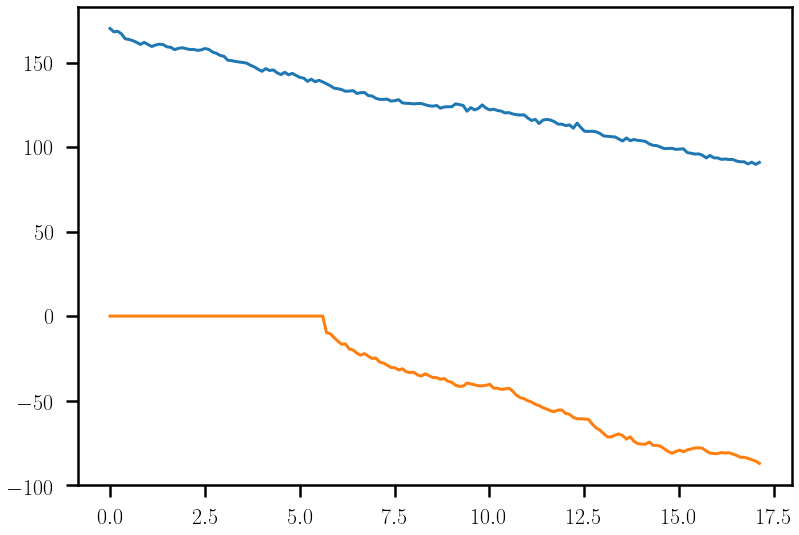

In [50]:
plt.plot(data1["t"],data1["θ"])
plt.plot(data2["t"],data2["θ"])

In [36]:
cnt=0
while(data2["θ"][cnt]<1e-9):
    print(data2["θ"][cnt])
    print(cnt)
    cnt+=1

0.0
0
0.0
1
0.0
2
0.0
3
0.0
4
0.0
5
0.0
6
0.0
7
0.0
8
0.0
9
0.0
10
0.0
11
0.0
12
0.0
13
0.0
14
0.0
15
0.0
16
0.0
17
0.0
18
0.0
19
0.0
20
0.0
21
0.0
22
0.0
23
0.0
24
0.0
25
0.0
26
0.0
27
0.0
28
0.0
29
0.0
30
0.0
31
0.0
32
0.0
33
0.0
34
0.0
35
0.0
36
0.0
37
0.0
38
0.0
39
0.0
40
0.0
41
0.0
42
0.0
43
0.0
44
0.0
45
0.0
46
0.0
47
0.0
48
0.0
49
0.0
50
0.0
51
0.0
52
0.0
53
0.0
54
0.0
55
0.0
56
-9.763036973
57
-10.4439064
58
-12.74443198
59
-14.89223558
60
-16.7055794
61
-16.47281133
62
-19.51682457
63
-20.06663523
64
-21.94805184
65
-23.13845924
66
-22.19812473
67
-23.71812081
68
-25.10479161
69
-24.813948
70
-27.2110586
71
-27.82155735
72
-29.08627612
73
-30.43694396
74
-30.57787683
75
-31.91232565
76
-31.1936879
77
-33.0039354
78
-33.44502991
79
-33.22688675
80
-34.84991022
81
-35.49157872
82
-34.16883055
83
-35.30113274
84
-36.37900748
85
-36.43297666
86
-37.45398095
87
-36.90750087
88
-38.62052004
89
-39.24922269
90
-40.93180382
91
-41.64559372
92
-41.46938462
93
-39.64281919
94
-40.202215

KeyError: 172

In [39]:
#Solo tomaremos los angulos y no los tiempos
ang_inc=data1["θ"][57:]
ang_tr=data2["θ"][57:]

Modelo:
$$n_1\sin \theta_1=n_2\sin\theta_2$$
Transformamos coordenadas:
$$y=\sin\theta_2=\sin\theta_{tr}$$
$$x=\sin\theta_1=\sin\theta_{inc}$$
$$n_1x=n_2y$$
$$y=\frac{n_1}{n_2}x$$
Ajuste:
$$\hat{y}=Bx+A$$

In [41]:
X=np.sin(ang_inc)
Y=np.sin(ang_tr)

In [44]:
print(lin.A(X,Y))
lin.B(X,Y)

0.10910651771640258


-0.09525579283959801

In [48]:
lin.fit(X,Y)

'y=0.11+-0.10x'